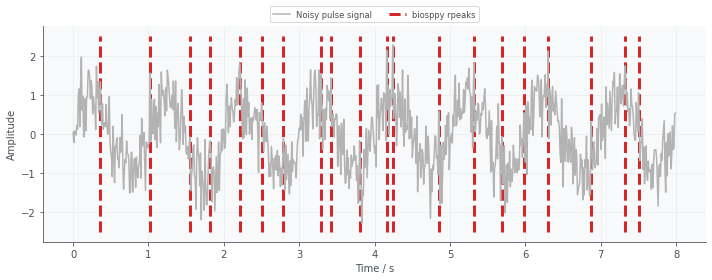

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg

np.random.seed(256)  # for reproducibility

# create time steps and corresponding sine wave with Gaussian noise
fs = 100  # sampling rate, Hz
ts = np.arange(0, 8, 1.0 / fs)  # time vector - 8 seconds

ys = np.sin(2*np.pi * 1.0 * ts)  # signal @ 1.0 Hz, without noise
yerr = 0.5 * np.random.normal(size=len(ts))  # Gaussian noise
yraw = ys + yerr

# Apply ECG processing from biosppy
out = ecg.ecg(signal=yraw, sampling_rate=fs, show=False)
biosppy_peaks = out['rpeaks']

# Plot signals and peaks
plt.figure(figsize=[10, 4])
plt.plot(ts, yraw, color=".7", label="Noisy pulse signal")
plt.vlines(ts[biosppy_peaks], *plt.ylim(), color="C3", lw=3, ls="dashed",
           label="biosppy rpeaks")

plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2,
           fontsize="smaller")
plt.tight_layout()
plt.show()


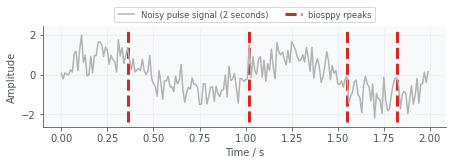

In [23]:
# Plot signals and peaks for the first 2 seconds
plt.figure(figsize=[6.4, 2.4])
plt.plot(ts[:2*fs], yraw[:2*fs], color=".7", label="Noisy pulse signal (2 seconds)")
plt.vlines(ts[:2*fs][biosppy_peaks[biosppy_peaks < 2*fs]], *plt.ylim(), color="C3", lw=3, ls="dashed",
           label="biosppy rpeaks")

plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2,
           fontsize="smaller")
plt.tight_layout()
plt.show()